In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-data-analysis/UberDataset.csv


<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong><center>Uber Data Analysis</center></strong></h1>
</div>

<img src="https://cdn.finshots.app/images/2022/07/uber-files.png" width=1200>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
import warnings
warnings.filterwarnings("ignore")

<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong><center>Load the dataset</center></strong></h1>
</div>

In [59]:
# Load the dataset
df = pd.read_csv(r"/kaggle/input/uber-data-analysis/UberDataset.csv")

In [60]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong><center>Convert date columns to datetime format</center></strong></h1>
</div>

In [61]:
# Convert date columns to datetime format
df["START_DATE"] = pd.to_datetime(df["START_DATE"], errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"], errors="coerce")

In [62]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,NaT,NaT,NaN,NaN,NaN,12204.7,NaN


<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong><center>Handle missing values</center></strong></h1>
</div>

In [63]:
# Handle missing values
df.dropna(subset=["START", "STOP"], inplace=True)
df["PURPOSE"].fillna("Unknown", inplace=True)

In [64]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong><center>Create a new column for trip date</center></strong></h1>
</div>

In [65]:
# Create a new column for trip date
df["DATE"] = df["START_DATE"].dt.date

In [66]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06


<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong><center>Plot trip frequency over time</center></strong></h1>
</div>

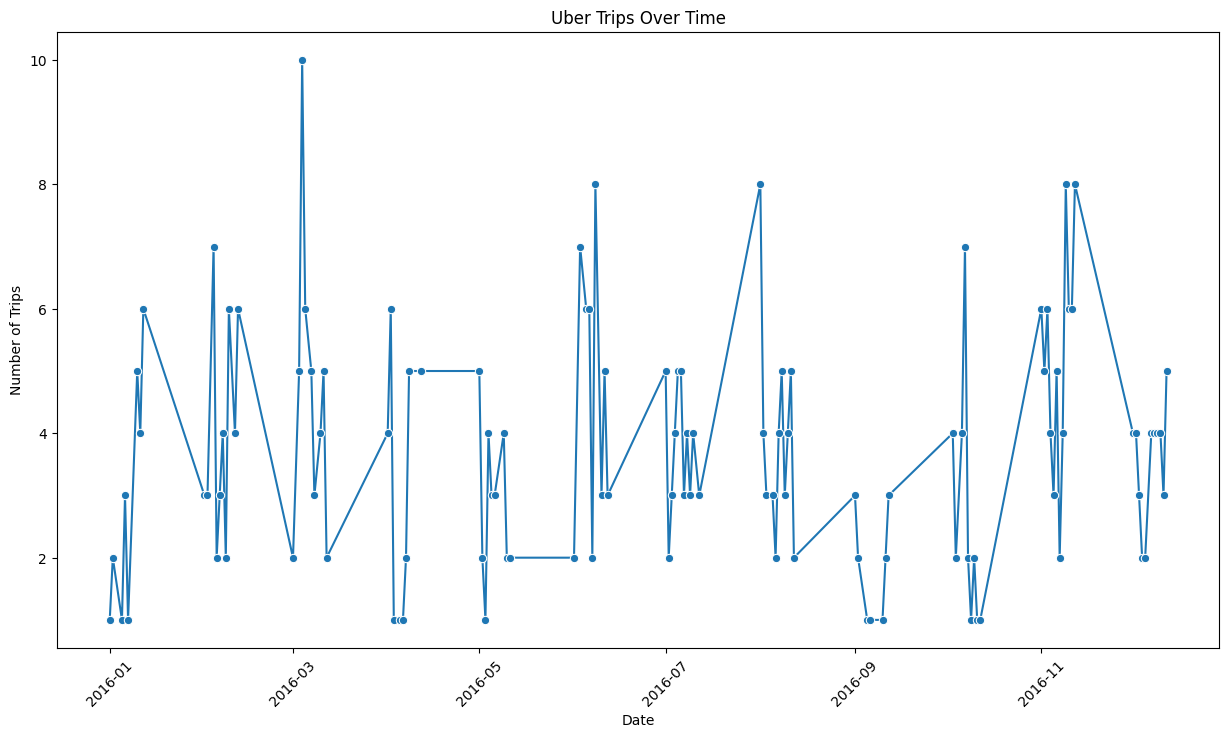

In [67]:
# Plot trip frequency over time
plt.figure(figsize=(15, 8))
sns.lineplot(x=df["DATE"].value_counts().sort_index().index,
             y=df["DATE"].value_counts().sort_index().values, marker="o")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Uber Trips Over Time")
plt.xticks(rotation=45)
plt.show()

**Uber Trips Over Time**

* The number of trips fluctuates significantly over time.

* Some days have a high volume of trips, while others have fewer.

<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong><center>Top 10 most common pickup and drop-off locations</center></strong></h1>
</div>

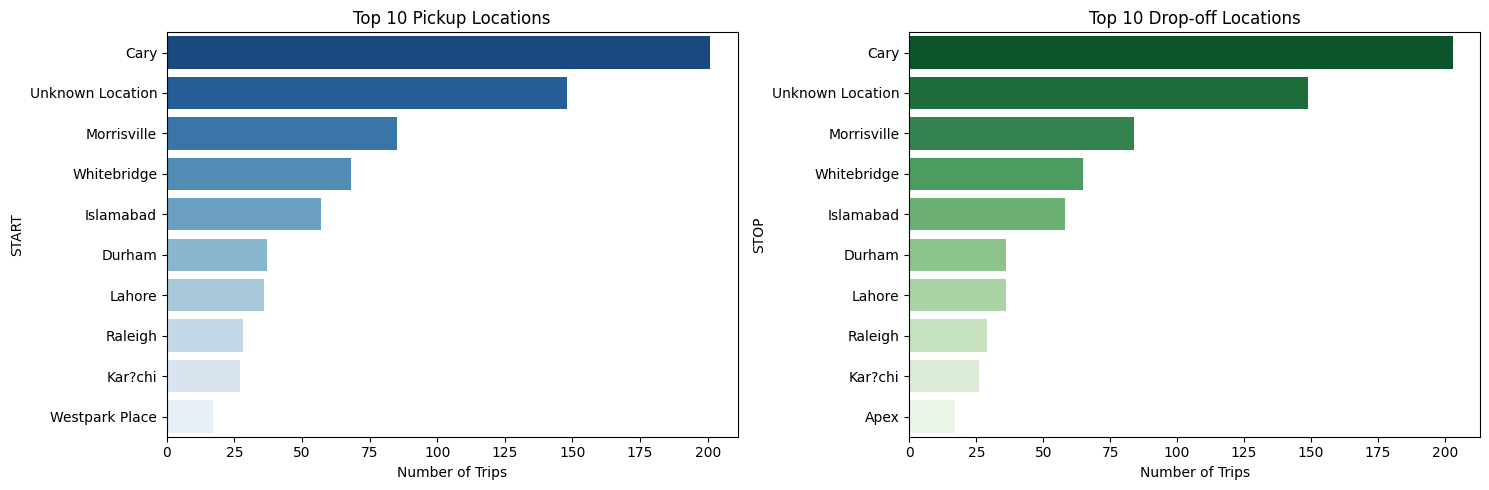

In [68]:
# Top 10 most common pickup and drop-off locations
top_pickups = df["START"].value_counts().head(10)
top_dropoffs = df["STOP"].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Pickup Locations")
axes[0].set_xlabel("Number of Trips")
sns.barplot(x=top_dropoffs.values, y=top_dropoffs.index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 Drop-off Locations")
axes[1].set_xlabel("Number of Trips")
plt.tight_layout()
plt.show()

**Most Frequent Locations**

* The top 10 pickup and drop-off locations show where trips start and end the most.

* Certain locations have significantly more trips, possibly business hubs or busy city areas.

<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong><center>Count of trips by purpose</center></strong></h1>
</div>

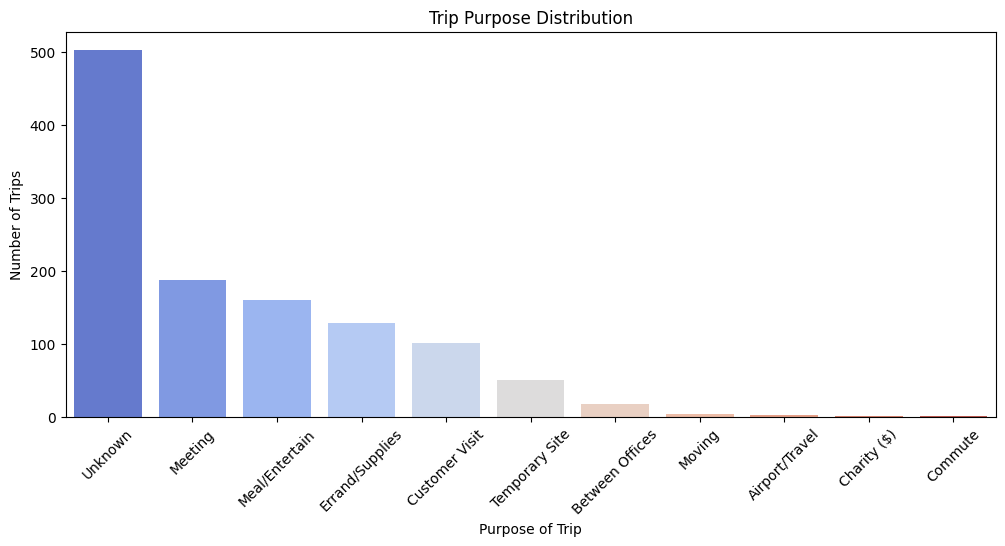

In [69]:
# Count of trips by purpose
trip_purpose_counts = df["PURPOSE"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=trip_purpose_counts.index, y=trip_purpose_counts.values, palette="coolwarm")
plt.xlabel("Purpose of Trip")
plt.ylabel("Number of Trips")
plt.title("Trip Purpose Distribution")
plt.xticks(rotation=45)
plt.show()

**Trip Purpose Analysis**

* The most common trip purposes include Meetings, Errands/Supplies, and Customer Visits.

* significant number of trips have Unknown purposes, which may indicate missing or unlogged reasons.

<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong><center>Hourly trip analysis</center></strong></h1>
</div>

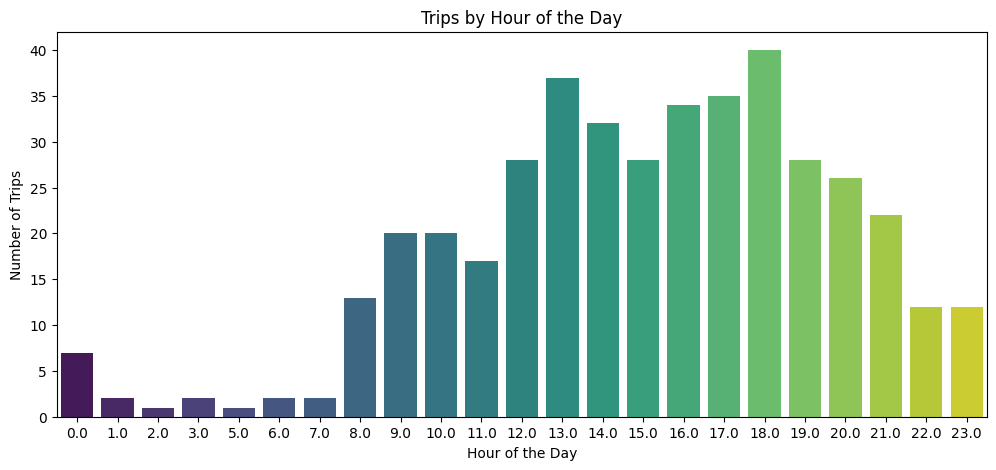

In [70]:
# Hourly trip analysis
df["HOUR"] = df["START_DATE"].dt.hour
plt.figure(figsize=(12, 5))
sns.countplot(x=df["HOUR"], palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips by Hour of the Day")
plt.show()

**Hourly trip analysis**

* Peak hours: Most trips occur during typical commuting times (morning and evening).

* Low activity: Fewer trips happen between midnight and early morning.

* Work-related trend: The data suggests business trips align with work hours.

<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong><center>Category-wise trip distribution</center></strong></h1>
</div>

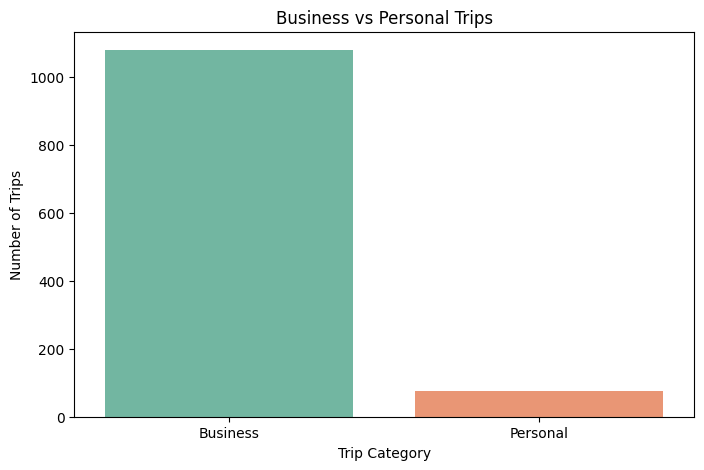

In [71]:
# Category-wise trip distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["CATEGORY"], palette="Set2")
plt.xlabel("Trip Category")
plt.ylabel("Number of Trips")
plt.title("Business vs Personal Trips")
plt.show()

**Category-wise trip Analysis**

* Business trips are more frequent than personal trips, suggesting most rides were work-related.

* Personal trips are fewer, indicating limited non-work travel or selective trip logging for personal use.

* Possible trend: If this is a work-related dataset, employees might use ride services primarily for business needs.

<div style="background-color: #1FBAD6; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong><center>Average trip distance by purpose</center></strong></h1>
</div>

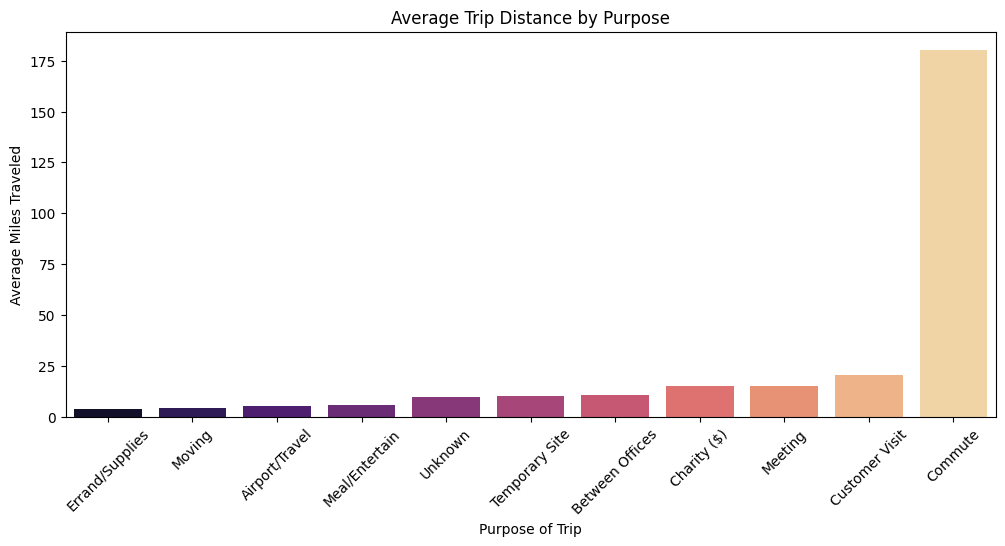

In [72]:
# Average trip distance by purpose
avg_miles_purpose = df.groupby("PURPOSE")["MILES"].mean().sort_values()
plt.figure(figsize=(12, 5))
sns.barplot(x=avg_miles_purpose.index, y=avg_miles_purpose.values, palette="magma")
plt.xlabel("Purpose of Trip")
plt.ylabel("Average Miles Traveled")
plt.title("Average Trip Distance by Purpose")
plt.xticks(rotation=45)
plt.show()

**Average trip Analysis**

* Longest trips are for business-related purposes like Customer Visits and Meetings.

* Shortest trips are for Errands, Meals, or Entertainment.

* Work travel dominates longer distances, while personal trips are generally shorter.

**Summary of Findings**

Trip Frequency: Varies over time, with some peak days.

Most Frequent Locations: Certain areas have higher pickups/drop-offs.

Trip Purpose: Business-related trips dominate, especially Meetings & Customer Visits.

Hourly Trip Analysis: When most trips occur.

Category-wise Trip Distribution: Business vs. Personal trips.

Average Trip Distance by Purpose.